# Линейная алгебра. Лабораторная работа 1, осень 2019

В этой лабораторной работе вы познакомитесь со средой Jupyter Notebook и библиотеками numpy и scipy.

## Часть 1. Библиотеки

В этой лабораторной работе вам понадобятся три библиотеки:

- `numpy` - основная библиотека для работы с матрицами;
- `scipy`, а точнее модуль `scipy.linalg`, содержащий множество функций линейной алгебры;
- `matplotlib` - графическая библиотека

Подключить их можно следующим образом:

In [3]:
# Запустите этот код
import numpy as np
import math
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

Теперь вы можете позвать, скажем, функцию `scipy.linalg.det()` с помощью кода `sla.det()`, а функцию `numpy.exp()` - с помощью кода `np.exp()`.

**Основные объекты и операции линейной алгебры в NumPy и SciPy:**

Основной объект, с которым вам придётся работать и в этой, и в следующих лабораторных - это, безусловно, матрицы. В библиотеке `numpy` они представлены классом `numpy.ndarray`. Матрицу можно создать из двумерного (а на самом деле и не только двумерного) массива следующим образом:

In [3]:
# Запустите этот код
A = np.array([[1, 2, 3], [4, 5, 6]])

print(A)
print(A.shape) # пара (число строк, число столбцов)

[[1 2 3]
 [4 5 6]]
(2, 3)


Обратите внимание, что матрица заполняется *по строкам*.

Есть и много других конструкторов матриц. Например, единичная матрица размера $n\times n$ создаётся с помощью функции `numpy.eye(n)`. Со всем многообразием конструкторов можно ознакомиться [на этой странице](https://docs.scipy.org/doc/numpy-1.10.1/reference/routines.array-creation.html).

Зачастую бывает нужно получить доступ к подматрицам данной матрицы, и numpy предоставляет множество удобных средств, как это сделать (называется slicing):
- элемент с номером `(i,j)`: `A[i,j]`
- i-я строка матрицы: `A[i,:]`
- j-й столбец матрицы: `A[:,j]`

**Внимание!** Оба варианта, и `A[i,:]`, и `A[:,j]` дают не строку или столбец, а одномерный вектор. Если вы хотите получить вектор-строку или вектор-столбец соответственно, используйте вот такой синтаксис: `A[i:i+1,:]`, и `A[:,j:j+1]`
- строки с нулевой по i-ю: `A[:i+1,:]`
- столбцы с j-го по последний: `A[:,j:]`
- строки с i-й по k-ю: `A[i:k,:]`

В некоторых случаях нужно получить доступ к (прямоугольной) подматрице, элементы которой находятся на пересечении строк из списка `rows` и столбцов `columns`. В этом случае `A[rows, columns]` даст не то, что вы ожидаете (можете попробовать это сделать сами и увидеть, что получится; только возьмите `rows` и `columns` одного размера). Справиться с этой задачей позволяет код `A[np.ix_(rows, columns)]`

*Умножение матриц* производится с помощью оператора `np.dot()`. Есть два варианта написания: `A.dot(B)` и `np.dot(A, B)`.

Обычные знаки арифметических действий (`+`, `-`, `*`) зарезервированы для поэлементных операций. Например, `A * B` - это матрица, элементами которой являются произведения $A_{ij}B_{ij}$. Помимо этих есть и множество других поэлементных операций. Например, `numpy.exp(A)` - это матрица, элементами которой являются экспоненты элементов матрицы `A`.

Чтобы получить матрицу, *транспонированную* к матрице `A`, напишите просто `A.T`. 

В некоторых случаях бывает нужно создавать *случайные матрицы*: например, при проведении экспериментов или для инициализации итеративных методов. Средства для этого предоставляет пакет [numpy.random](https://docs.scipy.org/doc/numpy/reference/routines.random.html). Так, `np.random.rand(m,n)` - это матрица $m\times n$, элементы которой независимо выбраны из равномерного распределения на интервале `[0;1)` 

Для *решения систем линейных уравнений* в пакете `scipy.linalg` есть множество методов, рассмотрение которых выходит за пределы курса линейной алгебры. Мы вам пока предлагаем пользоваться функцией `scipy.linalg.solve`, основанной на методе Гаусса. Отметим, что `scipy.linalg.solve(A, B)` выдаёт решение уравнения $AX = B$ (или ошибку), где $B$ может быть как вектором, так и матрицей.

Найти обратную матрицу для матрицы $A$ можно с помощью функции `sla.inv(A)`.

**Копирование сложных объектов в Python**

Когда вы делаете присваивание каких-то сложных объектов, как правило оно происходит по ссылке. Например, код
```
B = A
B[0,0] = 10
```
приведёт к изменению матрицы `A`.

Не попадайтесь в эту ловушку! Если вы хотите работать с копией как с независимой матрицей, используйте метод `copy()`:
```
B = A.copy()
```

**Где искать помощь**

Библиотеки `numpy` и `scipy` снабжены прекрасной документацией. Если у вас возникают вопросы о том, как работает та или иная функция (или даже как называется функция, выполняющая то, что вам нужно), вы почти всегда можете найти там ответы.

[Ссылка на документацию пакета scipy.linalg](https://docs.scipy.org/doc/scipy-0.18.1/reference/linalg.html)

**И всё-таки задание**

В качестве первого задания мы попросим вас отыскать соответствующие функции в библиотеке и сделать следующее:

- создайте нулевую матрицу $Z$ размера $3\times4$;

- создайте диагональную матрицу $5\times5$ с диагональными элементами 1, 2, 3, 4 и 5;

- найдите её след (не силою мысли, а с помощью библиотечных функций, конечно);

- найдите обратную к ней матрицу;

- сгенерируйте случайную матрицу $X$ размера $4\times5$;

- найдите определитель подматрицы матрицы $X$, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). Такой определитель называется **минором** матрицы $X$;

- найдите произведение $X^TX$.

Пожалуйста, каждый пункт делайте в новом блоке и не забывайте распечатывать результаты.

In [39]:
# нулевая матрица Z размера 3x4
Z = np.zeros((3, 4))
print(Z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [5]:
#диагональная матрица 5×5 с диагональными элементами 1, 2, 3, 4 и 5
M = np.diag(np.arange(1, 6))
print(M)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


In [6]:
#найдите её след
print(np.trace(M))


15


In [7]:
#найдите обратную к ней матрицу
print(np.linalg.inv(M))

[[ 1.          0.          0.          0.          0.        ]
 [ 0.          0.5         0.          0.          0.        ]
 [ 0.          0.          0.33333333  0.          0.        ]
 [-0.         -0.         -0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


In [8]:
#сгенерируйте случайную матрицу  𝑋 размера  4×5
X = np.random.rand(4,5)
print(X)

[[0.18309861 0.159063   0.94835007 0.21775122 0.56932942]
 [0.65398359 0.02526832 0.83469209 0.38594555 0.27211391]
 [0.16437677 0.61399525 0.68468161 0.92750406 0.14256596]
 [0.14139687 0.49975852 0.75270883 0.82646598 0.81736135]]


In [9]:
#найдите определитель подматрицы матрицы 𝑋, расположенной на пересечении 2 и 3 строки и 1 и 2 столбца; 
#считаем, что строки и столбцы нумеруются с единицы (используйте slicing!). 
#Такой определитель называется минором матрицы X
print(np.linalg.det(X[np.ix_([1,2], [0, 1])]))


0.39738929854031685


In [10]:
#найдите произведение  𝑋^𝑇 * 𝑋
print(np.dot(X.T, X)) 

[[0.50823244 0.21724013 0.93849293 0.56159182 0.42120832]
 [0.21724013 0.65268828 0.96850258 1.02690486 0.59345323]
 [0.93849293 0.96850258 2.63143822 1.7857833  1.47990232]
 [0.56159182 1.02690486 1.7857833  1.73967936 1.03674518]
 [0.42120832 0.59345323 1.47990232 1.03674518 1.0865866 ]]


## Часть 2. Время

Питон мотивирует пользоваться библиотечными функциями, когда они доступны, а не писать собственные. Библиотечные функции основаны на современных алгоритмах, обычно пишутся на более эффективных языках, таких как C++ или Fortran, а, кроме того, оптимизированы для работы на многопроцессорных устройствах, так что обогнать эти решения просто так вы не сможете.

Мы предлагаем вам убедиться в этом самим. Напишите функцию `my_det`, которая вычисляла бы определитель матрицы с помощью элементарных преобразований над строками. Функция должна выкидывать `ValueError` в случаях, если матрица не является квадратной.

In [136]:
def my_det(X):

    ''' Мы будем приводить матрицу к верхнетреугольной элементарными преобразованиями. Для этого будем
     обнулять все элементы ниже диагонали. Если элемент на диагонали X[i][i] окажется равен 0, то, чтобы небезрезультатно
     прибавлять i-ю строку к другим, поменяем местами i-ю строку j-й, у которой X[j][i] != 0. j > i, чтобы не испортить
     предыдущие столбцы (функция swap). Также приведем все элементы матрицы к типу float, так как в процессе элементарных
     преобразований элементы могут стать нецелыми.'''

    def swap(X, i, sign):  # меняем две строки местами
        checker = 0 #есть ли ненулевые элементы
        for j in range(i + 1, X.shape[0]):
            if X[j][i] != 0:  # если нашли в том же столбце ненулевой элемент
                X[i, :], X[j, :] = np.copy(X[j, :]), np.copy(X[i, :])  # меняем строки местами
                sign *= -1  # учитываем знак
                checker = 1
        return X, sign, checker

    def elementary(X, i):  # делаем элементарное преобразование; i - номер строки, которой мы обнуляем элементы в некотором столбце
        for j in range(i + 1, X.shape[0]):  #рассматриваем строки с i+1, так как для верхнетреуг. матрицы неважно, что стоит выше диагонали
            if X[i][i] == 0:
                return 0
            koef = X[j][i] / X[i][i]  #коэффициент, с которым будем прибавлять i-ю строку
            for k in range(i, X.shape[0]): #с i, так как элементы левее x[i][i] равны нулю
                X[j][k] -= koef * X[i][k]  # почленно складываем
        return X
    
    checker = 1
    X = X.astype(float)
    if X.shape[0] != X.shape[1]: #если матрица не квадратная
        raise ValueError
    sign = 1 #знак определителя
    det = 1 #сам определитель
    
    for i in range(X.shape[0]):
        if X[i][i] == 0: #если элемент на диагонали оказался нулевым
            X, sign, checker = swap(X, i, sign) #поменяем местами строки
            if checker == 0:
                return 0
        X = elementary(X, i) #обнулим элементы i-го столбца ниже i-го элемента

    for i in range(X.shape[0]):
        det *= X[i][i] #определитель равен произведению диагональных элементов
    det *= sign
    return det
  



Простая проверка:

In [137]:
# Запустите этот блок кода
X = np.array([[0,0,1], [0,1,0], [1,0,0]])
print(X)
print(my_det(X))

[[0 0 1]
 [0 1 0]
 [1 0 0]]
-1.0


На случай, если нам просто повезло с этой матрицей, имеет смысл написать чуть более хитрые тесты. Мы сгенерируем несколько случайных матриц $8\times8$ с помощью функции `numpy.random.rand` и сравним ответ, выдаваемый нашей функцией, с настоящим определителем (результатом работы библиотечной функции `scipy.linalg.det`):

In [138]:
# Запустите этот блок кода
for _ in range(10):
    X = np.random.rand(8,8)
    if np.abs(my_det(X) - sla.det(X)) > 1e-6:
        print('FAILED')

Если вы ни разу не получили `FAILED`, то ваша функция работает правильно.

Теперь давайте сравним скорость работы вашей функции и библиотечной функции `scipy.linalg.det`. В Питоне есть несколько способов измерения времени; мы воспользуемся декоратором `%timeit`. Будучи написан перед функцией, он запускает её некоторое количество раз, выбирает три случайных запуска и возвращает длительность самого быстрого из них. Модификатор `-o` между декоратором и функцией позволяет сохранять результаты работы декоратора в переменную.

Приготовьтесь, что следующий блок может работать сравнительно долго.

17.6 µs ± 585 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
465 µs ± 7.96 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
120 µs ± 4.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
365 ms ± 3.47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
24.8 ms ± 770 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


/Users/arina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in double_scalars


13min 44s ± 7min 27s per loop (mean ± std. dev. of 7 runs, 1 loop each)


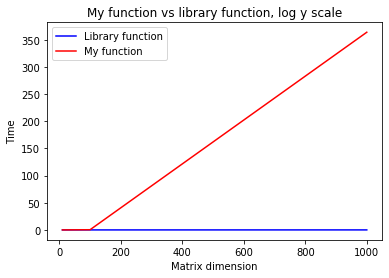

In [139]:
# Запустите этот блок кода
lib_times = []
my_times = []
dimensions = [10, 100, 1000]
for dim in dimensions:
    A = np.random.rand(dim, dim)
    res_lib = %timeit -o sla.det(A)
    lib_times.append(res_lib.best)
    res_my = %timeit -o my_det(A)
    my_times.append(res_my.best)    

plt.plot(dimensions, lib_times, color='blue', label='Library function')
plt.plot(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

У вас должны были получиться графики, показывающие, как растёт с ростом размерности матрицы время вычисления определителя. Поскольку они вышли не больно-то красивыми, мы нарисуем их в *логарифмическом масштабе* по оси у:

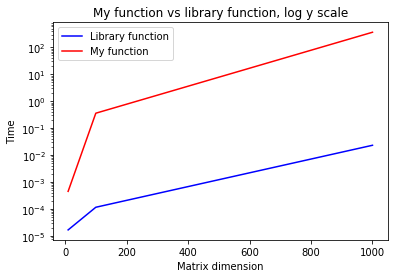

In [140]:
# Запустите этот блок кода
plt.semilogy(dimensions, lib_times, color='blue', label='Library function')
plt.semilogy(dimensions, my_times, color='red', label='My function')
plt.title('My function vs library function, log y scale')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Вы можете убедиться, что библиотечная функция работает *гораздо* быстрее.

## Часть 3. Точность

Наверняка вы уже что-то знаете про floating point arithmetics и связанные с этим трудности и понимаете, что на компьютере вычисления с вещественными числами производятся лишь с ограниченной точностью. 

В качестве первого примера, показывающего различие между длинной арифметикой целых чисел и floating point arithmetics, предлагаем вам перемножить две пары матриц:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$
Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Посмотрим, получатся ли одинаковые ответы:

In [99]:
A_first = np.array([[1, 0], [(10 ** 20), 1]])
B_first = np.array([[(10 **(-20)), 1], [0, 1-(10 ** 20)]])
print(A_first.dot(B_first).astype(int))
A_second = A_first.astype(float)
B_second = B_first.astype(float)
print(A_sec.dot(B_sec))

[[0 1]
 [1 1]]
[[1.e-20 1.e+00]
 [1.e+00 0.e+00]]


первый ответ правильный, так как  $C[1][1] = 1$, где $C = A \cdot B$, но во втором $C[1][1] \neq 1$.

Впрочем, и с целыми числами тоже не всегда всё хорошо. Напишите функцию, генерирующую *матрицу Паскаля* заданной размерности $n$, то есть матрицу $P$, в которой $P_{ij} = C_{i+j}^i$. В этом задании нельзя пользоваться библиотечной функцией `scipy.linalg.pascal` или её аналогами из других библиотек. Обратите внимание, что использование факториалов крайне нежелательно, так как быстро приведёт к переполнению.

В этом задании вы можете использовать цикл ``for``.

In [100]:
def my_pascal(dim):
    P = np.ones((dim, dim)) 
    #так как элементы в нулевых строках и столбцах равны 1 (и через них вычисляются следующие элементы) 
    #заполним изначально матрицу единицами, а не нулями
    for i in range(1, dim):
        for j in range(1, dim):
            P[i][j] = P[i][j - 1] + P[i - 1][j]
    return P.astype(int)
print(my_pascal(4))

[[ 1  1  1  1]
 [ 1  2  3  4]
 [ 1  3  6 10]
 [ 1  4 10 20]]


Чему равен её определитель? Обязательно объясните свой ответ.

----
**Ваше решение**

Вспомним, что $\sum \limits_{k = 0} ^ {n} C_{n} ^ {k} \cdot C_m ^ {n-k} = C_{n+m} ^ {n}$
Возьмем вместо $n$ $i$,  вместо $m$ --- $j$. Тогда равенство принимает вид $\sum \limits_{k = 0} ^ {n} C_{i} ^ {k} \cdot C_j ^ {i-k} = C_{i+j} ^ {i}$. Так как $C_j ^ {i-k} = C_j ^ {k}$, то $\sum \limits_{k = 0} ^ {n} C_{i} ^ {k} \cdot C_j ^ {k} = C_{i+j} ^ {i}$. Справа находится формула для $P[i][j]$ из условия. Тогда матрицу Паскаля можно представить в виде произведения нижнетреугольной и верхнетреугольной,  у которых на диагоналях стоят единицы (значит, и их определители равны 1). Так как det($A \cdot B$) = det($A) \cdot$ det($B$) = $1 \cdot 1 = 1$.

А теперь вычислите определитель матрицы Паскаля $30\times30$ с помощью библиотечной функции `scipy.linalg.det`:

In [28]:
P = sla.pascal(30)
print(sla.det(P))

1.0299188904699096e+48


Разница заметна невооружённым взглядом!

## Часть 4. Матричные вычисления

Вы уже видели, что использования циклов (и самописных вычислений в целом) в Питоне лучше по возможности избегать, и важно уметь находить способы делать всё библиотечными средствами.

В качестве примера рассмотрим две задачи:

**1.** Предположим, нужно вычислить суммы элементов в каждой строке матрицы `A`. Ясно, что можно написать простую функцию с двумя циклами, которая это посчитает, но так лучше не делать. Правильный способ такой:
```
A.sum(axis=1)
```
Параметр `axis=1` означает, что суммы берутся по строкам. Если вы хотите просуммировать по столбцам, укажите `axis=0`. Если вообще пропустить параметр `axis` (вызвать `A.sum()`), то функция вернёт сумму *всех* элементов матрицы.

**2.** Теперь допустим, что нам нужно каждый столбец матрицы `A` умножить на некоторое число. Более точно, пусть у нас есть (одномерный) вектор `w = np.array([w_1,...,w_n])`, и мы должны `i`-й столбец `A` умножить на число `w_i`. Опять же, это можно сделать в пару циклов, но лучше использовать операцию поэлементного умножения:
```
A * w.reshape((1,n))
```
Оператор `reshape` нужен для того, чтобы из одномерного вектора сделать вектор-строку.

Аналогично если на числа `w_1,...,w_n` умножаются *строки* матрицы, нужно превратить `w` в вектор-столбец:
```
A * w.reshape((n,1))
```

Дальше вам будет предложено попрактиковаться в матричных вычислениях. В следующих трёх заданиях нельзя пользоваться циклами, а также конструкциями `map` и `reduce` и им подобными; вместо этого постарайтесь свести всё к матричным операциям из `numpy` (но, опять же, не `np.vectorize` или чему-то подобному). Чтобы убедиться, что получилось именно то, что нужно, пишите собственные тесты со случайными матрицами.

**Задание 4.1** Напишите функцию `prod_and_sq_sum(A)`, вычисляющую произведение и сумму квадратов диагональных элементов квадратной матрицы `A`.

In [101]:
def prod_and_sq_sum(A):
    if A.shape[0] != A.shape[1]:
        return ('Матрица должна быть квадратная')
    elems_square = np.diag(A)*np.diag(A)
    summ = sum(elems_square)
    product = np.prod(elems_square)
    return(summ, product)

def prod_and_sum_checker(A):
    ch_summ = 0
    ch_product = 1
    if A.shape[0] != A.shape[1]:
        return ('Матрица должна быть квадратная')
    for i in range(A.shape[0]):
        ch_product *= A[i][i] * A[i][i]
        ch_summ += A[i][i] * A[i][i]
    return(ch_summ, ch_product)

for i in range(5):
    A = np.random.rand(10, 10)
    #print(A)
    summ, product = prod_and_sq_sum(A)
    ch_summ, ch_product = prod_and_sum_checker(A)
    if abs(summ - ch_summ) > 10**-20 or abs(product - ch_product) > 10**-20:
        print('Неправильный ответ')

**Задание 4.2** Для матриц `A` и `B` размера $m\times n$ обозначим через $a_1,\ldots,a_n$ и $b_1,\ldots,b_n$ соответственно их столбцы. Напишите функцию `f(A, B, k)`, вычисляющую

$$\sum_{i=1}^{\min(k,m)}a_ib_i^T$$

In [107]:
def f(A, B, k):
    if A.shape[0] != A.shape[1]:
        return ('Матрица должна быть квадратная')
    m = A.shape[0]
    k = min(k, m)
    return A[:,:k].dot(B[:,:k].T)
def checker(A, B, k):
    if A.shape[0] != A.shape[1]:
        return ('Матрица должна быть квадратная')
    sum = 0
    result = A.copy()
    m = A.shape[0]
    k = min(k, m)
    for i in range(k):
        a = A[:, i].copy()
        b = B[:, i].copy()
        sum += a * b.reshape(m, 1)
    return sum.T
for i in range(5):
    A = np.random.rand(5, 5)
    B = np.random.rand(5, 5)
    res1 = checker(A, B, 4)
    res2 = f(A, B, 4)
    for i in range(4):
        for j in range(4):
            if res1[i][j] - res2[i][j] >= 1e-6:
               print('Неправильный ответ')


**Задание 4.3** Напишите функцию `get_diag(A,B)`, принимающую две квадратных матрицы матрицы `A` и `B` одного размера и возвращающую вектор диагональных элементов произведения `AB`, не вычисляя произведение целиком. 

In [134]:
def get_diag(A,B):
    if A.shape[0] != A.shape[1]:
        return ('Матрица должна быть квадратная')
    return (A * B.T).sum(axis=1)
for i in range(5):
    A = np.random.rand(5, 5)
    B = np.random.rand(5, 5)
    res1 = np.diag(np.dot(A, B))
    res2 = get_diag(A, B)
    for i in range(4):
        if res1[i] - res2[i] >= 1e-6:
               print('Неправильный ответ')

## Часть 5. Комплексные числа и геометрия

У вас уже была возможность убедиться, что многие операции над комплексными числами имеют наглядную геометрическую интерпретацию. В этом задании вам будет предложено этим воспользоваться.

В Python число $i$ (мнимая единица) обозначено через `1j`. Так, число $0,5 + 1,2i$ будет иметь вид `0.5 + 1.2 * 1j`.

При выполнении задания вы должны работать с точками плоскости как с комплексными числами. Любые преобразования должны быть реализованы с помощью операций над комплексными числами: сложения, вычитания, умножения, деления, возведения в степень и комплексного сопряжения.

**Задание 5.1** Напишите функцию `shrink_rotate`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- действительный коэффициент `coef`,
- угол `alpha`, заданный в радианах

и осуществляет следующее преобразование: мы берём вектор $AX$, умножаем его `coef`, поворачиваем вокруг точки $A$ на угол `alpha` против часовой стрелки, после чего возвращаем конец полученного вектора. Ниже (левая картинка) мы приводим иллюстрацию действия этого преобразования:

<img src="ShrinkRotate.png">

**Задание 5.2** Напишите функцию `shrink_rotate_conj`, которая сначала делает то же самое, что и `shrink_rotate`, а после этого отражает вектор $AY$ отражает вектор относительно горизонтальной прямой, проходящей через точку $A$, и возвращает точку $Y'$ (см. правую часть рисунка).

**Задание 5.3** Напишите функцию `geometric_inverse`, которая принимает на вход:
- заданную в виде комплексного числа точку $X$, которую мы подвергаем преобразованию,
- заданную в виде комплексного числа точку $A$, 
- положительное действительное число $r$

и осуществляет инверсию точки $X$ относительно окружности с центром $A$ радиуса $r$ ([определение инверсии вы можете посмотреть здесь](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F_(%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%8F%29)).

In [123]:
def shrink_rotate(x, a, coef=1., angle=0.):
    v = coef * (x - a) #вычитаем a для поворота, потом прибавим обратно
    v_x = v.real * math.cos(angle) - v.imag * math.sin(angle)
    v_y = v.real * math.sin(angle) + v.imag * math.cos(angle)
    return complex(v_x, v_y) + a 
    raise NotImplementedError()
    
def shrink_rotate_conj(x, a, coef=1., angle=0.):
    y = shrink_rotate(x, a, coef=1., angle=0.)
    a_new = np.conj(a)
    y_new = np.conj(y)
    delta = y_new - a_new
    return (delta + a)
    raise NotImplementedError()
    
def geometric_inverse(x, a, r):
    k = r*r / ((x.real-a.real)**2 + (x.imag-a.imag)**2)
    x0 = a.real + k * abs(x.real-a.real)
    y0 = a.imag + k * abs(x.imag - a.imag)
    return complex(x0, y0)
    raise NotImplementedError()

**Задание 5.4** Рассмотрим следующий процесс:

```
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
```

Запустите его и нарисуйте множество точек, получающихся на итерациях начиняя с десятой.

*Указание*. Представьте квадрат $[-1,1]\times[-1,1]$ матрицей пикселей 1000x1000. Сначала все элементы матрицы положим нулями, а на каждой итерации начиная с десятой будем присваивать единицу соответствующему пикселю этой матрицы. То, что получилось, можно нарисовать с помощью функции `plt.imshow(..., cmap='gray')`. Картинку лучше сделать побольше, предварив `imshow` вызовом `plt.figure(figsize=(20, 20))`.

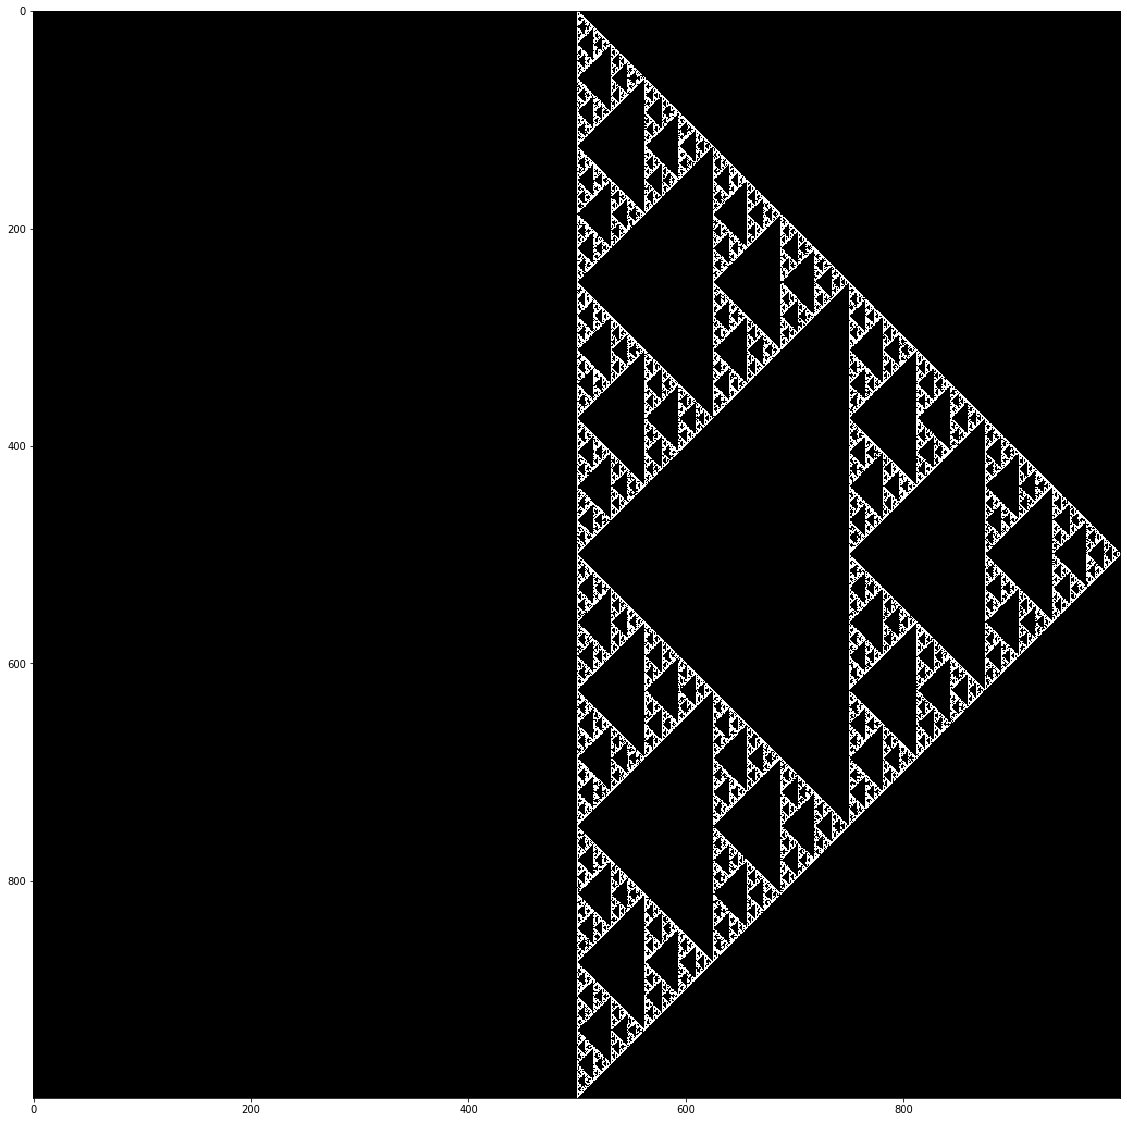

In [124]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.))
]

P = np.zeros((1000,1000))

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter > 8:
        P[int(z.real * 500 + 500)][int(z.imag * 500 + 500)] = 1 #чтобы каждый индекс был [0; 1000]
plt.figure(figsize = (20, 20))
plt.imshow(P, cmap='gray')

**Задание 5.5 (со звёздочкой)** Попробуйте объяснить, почему получается именно эта фигура.

---
Ваше объяснение

**Задание 5.5** Поэкспериментируйте с другими преобразованиями. Попробуйте найти какой-нибудь другой красиво выглядящий фрактал.

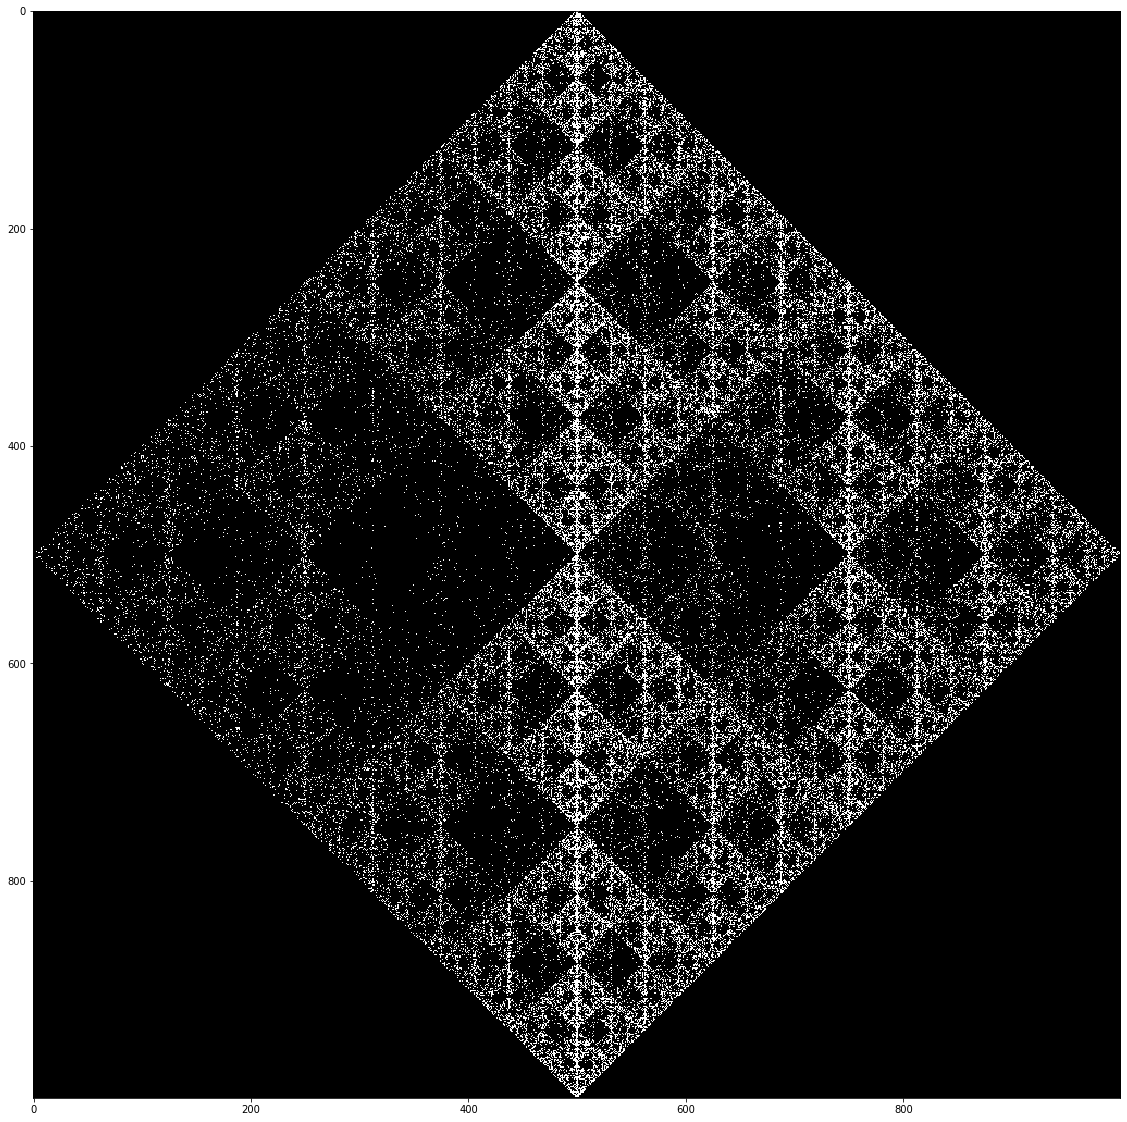

In [125]:
z = 0.5 + 0.*1j
max_iter = 100000
funcs = [
    (lambda t: shrink_rotate(t, 0. + 1.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, 1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate(t, -1. + 0.*1j, coef=0.5, angle=0.)),
    (lambda t: shrink_rotate_conj(t, 0 + 0.*1j, coef=0.5, angle = 0.))
]

P = np.zeros((1000,1000))

for n_iter in range(max_iter):
    n_func = np.random.choice(len(funcs))
    z = funcs[n_func](z)
    if n_iter > 8:
        P[int(z.real * 500 + 500)][int(z.imag * 500 + 500)] = 1 #чтобы каждый индекс был [0; 1000]
plt.figure(figsize = (20, 20))
plt.imshow(P, cmap='gray')

## Бонус. Метод Гаусса или обратные матрицы?

Пусть нам дано матричное уравнение $Ax = B$, где $A$ --- матрица размера $n\times n$, а $B$ --- матрица размера $n\times m$ (отметим, что это уравнение можно интерпретировать как $m$ систем с векторными правыми частями и однаковыми левыми). Вообще говоря, методов решения таких уравнений очень много, но мы пока рассмотрим два из них, с которыми вы уже хорошо знакомы.
1. Метод Гаусса;
2. Умножение на обратную матрицу: $x = A^{-1}B$.

В этом задании вы попробуете ответить на вопрос о том, какой из этих методов эффективнее. Проведите два эксперимента:
- сравните скорости решения системы при фиксированном `m = 10` и `n`, изменяющемся в пределах от 10 до 1000, например, для `n=10, 50, 100, 200, 500, 1000` (рост числа неизвестных при фиксированном количестве правых частей);
- сравните скорости решения системы при фиксированном `n = 100` и `m`, меняющемся от 10 до 10000, например, для `m = 10, 100, 500, 1000, 2000, 5000, 10000` (рост числа правых частей при фиксированном числе неизвестных).

При проведении экспериментов не возбраняется использовать циклы `for`.

Эксперименты проведите на случайных матрицах, созданных с помощью функции `numpy.random.rand`. Постройте графики времени выполнения функции от размерности (лучше в логарифмическом масштабе). Сделайте выводы (в письменном виде!) о том, какой их методов оказывается лучше в каких обстоятельствах.

Чтобы всё это не казалось вам чёрной магией, найдите число операций (суммарно сложения, умножения и деления), необходимых для решения системы каждым из методов. Обратите внимания на члены суммарной степени 3 (суммарной по $m$ и $n$; члены меньшего порядка можете даже не считать). Постарайтесь объяснить полученные ранее результаты.

11.4 µs ± 19.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
12.1 µs ± 88.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
48.4 µs ± 1.96 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
68.2 µs ± 3.76 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
124 µs ± 6.81 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
188 µs ± 446 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
310 µs ± 3.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
771 µs ± 22.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.69 ms ± 71.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
8.09 ms ± 564 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
16.1 ms ± 118 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
53.2 ms ± 4.85 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


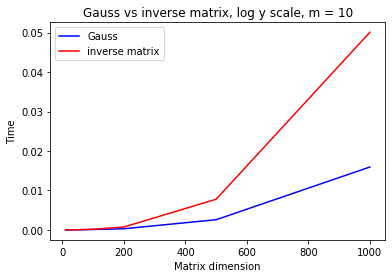

In [131]:
"""m = 10` и `n`, изменяющемся в пределах от 10 до 1000"""

def gauss(A, B):
  duration = %timeit -o np.linalg.solve(A, B)
  return duration.best

def inverse(A, B):
  duration = %timeit -o np.dot(np.linalg.inv(A), B)
  return duration.best

n_val = [10, 50, 100, 200, 500, 1000]

time_gauss = [] #тут будет храниться время работы гаусса
time_inverse = [] #а тут - через обратную матрицу

for value in n_val:
    A = np.random.rand(value, value)
    B = np.random.rand(value, 10)
    time_gauss.append(gauss(A, B))
    time_inverse.append(inverse(A, B))  

plt.plot(n_val, time_gauss, color='blue', label='Gauss')
plt.plot(n_val, time_inverse, color='red', label='inverse matrix')
plt.title('Gauss vs inverse matrix, log y scale, m = 10')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Видим, что при $n > 200$ гораздо эффективнее оказывается метод Гаусса. 

122 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
196 µs ± 2.27 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
188 µs ± 2.36 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
230 µs ± 28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
497 µs ± 35.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
316 µs ± 5.29 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.28 ms ± 52.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
634 µs ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.64 ms ± 190 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.13 ms ± 49.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.67 ms ± 246 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.8 ms ± 206 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.4 ms ± 181 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.42 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 100 loops e

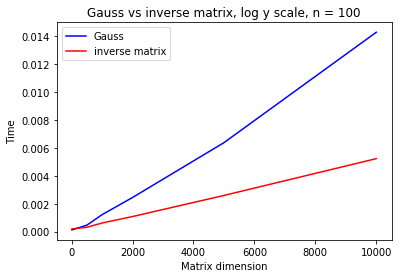

In [133]:
"""`n = 100` и `m`, меняющемся от 10 до 10000"""

m_val = [10, 100, 500, 1000, 2000, 5000, 10000]

time_gauss = [] #тут будет храниться время работы гаусса
time_inverse = [] #а тут - через обратную матрицу

for value in m_val:
    A = np.random.rand(100, 100)
    B = np.random.rand(100, value)
    time_gauss.append(gauss(A, B))
    time_inverse.append(inverse(A, B))  

plt.plot(m_val, time_gauss, color='blue', label='Gauss')
plt.plot(m_val, time_inverse, color='red', label='inverse matrix')
plt.title('Gauss vs inverse matrix, log y scale, n = 100')
plt.ylabel('Time')
plt.xlabel('Matrix dimension')
plt.legend()

Эффективнее оказывается использовать обратную матрицу

Оценим сложности метода Гаусса и решения уравнений через обратную матрицу. Пусть $A \in \operatorname{Mat}_{n \times m}$. Когда мы выбираем главный элемент в $i$-м столбце (чтобы обнулить другие ниже него),  мы делаем не более $n-i$ операций. Также мы переставляем строки за O(1). Прибавляя строку, содержащую главный элемент, к другим, мы совершаем $(n-i) \cdot (m-i)$ операций в матрице коэффициентов + (n-1) операций в правой части. Также $(n-i) \cdot (m-i)$ и $(n-1)$ надо домножить на 3, так как, чтобы получить коэффициент, на который будем домножать строку с главным элементом, надо совершить 2 операции (деления и умножения), и, чтобы получить новый элемент, нужно совершить еще одну операцию сложения. Тогда суммарно мы совершаем не более $\sum \limits_{i = 0} ^ {n-1} (3 \cdot ((n-i) \cdot (m-i) + n-1) + n - i) = \sum \limits_{i = 0} ^ {n-1} ((3 \cdot n - 3 \cdot i) \cdot (m - i) + 3 \cdot n - 3 + n - i) = \sum \limits_{i = 0} ^ {n-1} (3 \cdot n \cdot m - 3 \cdot n \cdot i - 3 \cdot m \cdot i + 3 \cdot i^2 + 4 \cdot n - 3 - i) = 3 \cdot n \cdot m \cdot (n-1) - 3 \cdot n \cdot \sum \limits_{i = 0} ^ {n-1} i - 3 \cdot m \cdot \sum \limits_{i = 0} ^ {n-1} i + 3 \cdot \sum \limits_{i = 0} ^ {n-1} i^2 + (4 \cdot n - 3) \cdot (n-1) - \sum \limits_{i = 0} ^ {n-1} i = 3 \cdot n \cdot m \cdot (n-1) - 3 \cdot n \cdot \dfrac{n-1}{2} \cdot n - 3 \cdot m  \cdot \dfrac{n-1}{2} \cdot n + 3 \cdot \dfrac{n \cdot (n-1)}{6} \cdot (2n-1) + (4 \cdot n - 3) \cdot (n-1) - \dfrac{n-1}{2} \cdot n =  -2 \cdot n \cdot (n-1) \cdot n + 3 \cdot m  \cdot \dfrac{n-1}{2} \cdot n + \dfrac{n \cdot (n-1)}{2} \cdot (2n-1) + (4 \cdot n - 3) \cdot (n-1) = \dfrac{1}{2} \cdot (3 \cdot m \cdot n^2 - 3 \cdot m \cdot n + 2 \cdot n^3 + n^2 - 9 \cdot n + 6) = O(n^3)$ операций.

При поиске обратной матрицы мы приписываем справа единичную матрицу того же размера, значит, матрица $n \times n$ становится матрицей $n \times 2 \cdot n$. Если искать обратную матрицу методом Гаусса (приводя исходную матрицу к единичной), нужно сделать $\dfrac{1}{2} \cdot (6  \cdot n^3 - 6 \cdot n^2 + 2 \cdot n^3 + n^2 - 9 \cdot n + 6) = \dfrac{1}{2} \cdot (8  \cdot n^3 - 5 \cdot n^2 - 9 \cdot n + 6) = 4n^3 - \dfrac{5}{2} \cdot n^2 - \dfrac{9}{2} \cdot n + 3 = O(n^3)$ операций. После этого нужно умножить получившуюся матрицу на матрицу $n \times m$ за O($n^2 + m$). Из-за этого метод обратной матрицы работает быстрее для относительно небольших $n$ (когда $2 \cdot n < m$), но медленнее, когда $n$ становится больше (первый пример).